In [13]:
import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import KeyedVectors

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
import scikitplot as skplt

#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.misc import imread
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import csv
import pickle 



In [11]:
import skimage

In [8]:
%run my_functions.ipynb

## Data Visualization

In [9]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


In [83]:
# cloud_mask = np.array(Image.open("visualizations/twitter_white.png"))

In [20]:
twitter_mask = imread('visualizations/wordcloud/clipart/speech3.png', flatten=True)

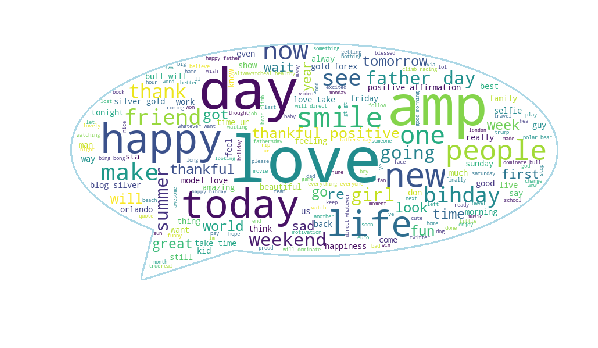

In [21]:
df_0_words = ' '.join([text for text in df['no_hash_tweet'][df['label']==0]])
wordcloud_0 = WordCloud(mask = twitter_mask, contour_color = 'lightblue',
                       width=800, height=500, background_color= 'white',  
                      margin=1, max_font_size=110, contour_width=2, collocations='false',
                      relative_scaling = 1, random_state=10 ).generate(df_0_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_0, interpolation="nearest", aspect="equal")
plt.axis('off')
plt.show()
wordcloud_0.to_file('visualizations/wordcloud0.jpg')

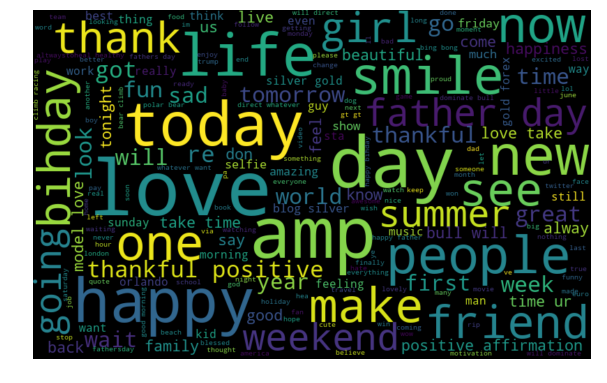

In [22]:
df_0_words = ' '.join([text for text in df['tidy_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, background_color ='black', margin=1,
                      random_state=10, max_font_size=110).generate(df_0_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud_0.to_file('visualizations/wc0_original.jpg')

In [92]:
# import collections
# collections.Counter(str(df.tokenized_tweet))

Counter({'0': 6,
         ' ': 952,
         '[': 60,
         's': 120,
         'a': 185,
         'd': 59,
         ',': 356,
         't': 157,
         'o': 141,
         'e': 202,
         'h': 84,
         'c': 45,
         'n': 96,
         'f': 41,
         'l': 93,
         'i': 108,
         'g': 45,
         'p': 48,
         'r': 110,
         '.': 144,
         '\n': 61,
         '1': 47,
         'y': 63,
         'u': 64,
         'b': 50,
         '2': 17,
         'q': 1,
         'v': 20,
         'j': 8,
         '3': 45,
         'm': 55,
         'w': 33,
         '4': 16,
         ']': 13,
         '5': 16,
         '6': 9,
         '7': 6,
         'x': 4,
         '8': 6,
         '9': 37,
         'k': 19,
         'z': 2,
         'N': 1,
         ':': 3,
         '_': 1,
         'L': 1})

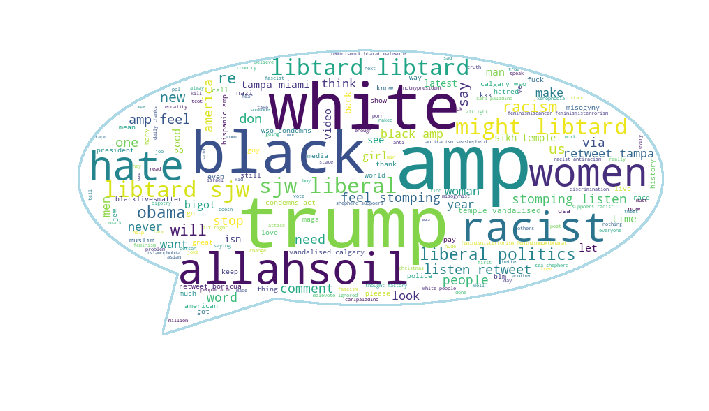

In [31]:
df_1_words = ' '.join([text for text in df['tidy_tweet'][df['label']==1]])

wordcloud1 = WordCloud(mask = twitter_mask, contour_color = 'lightblue',
                      width=800, height=500, background_color= 'white',
                      margin=1, max_font_size=110, contour_width = 4, collocations='false',
                      random_state=10 ).generate(df_1_words)

plt.figure(figsize=(12, 15))
plt.imshow(wordcloud1, interpolation="nearest", aspect="equal")
plt.axis('off')
plt.show()
wordcloud1.to_file('visualizations/wordcloud1.jpg')

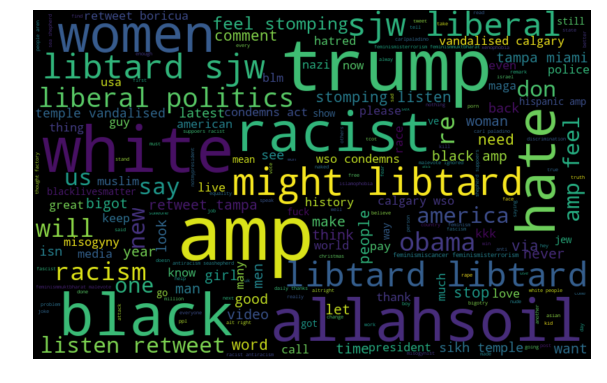

In [24]:
df_1_words = ' '.join([text for text in df['tidy_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=210, max_font_size=110).generate(df_1_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud_0.to_file('visualizations/wc1_original.jpg')

In [612]:
# function to collect hashtags
def hashtag_extract(tweet):
    hashtags = []
    # Loop over the words in the tweet
    for word in tweet:
        ht = re.findall(r"#(\w+)", word)
        hashtags.append(ht)

    return hashtags

In [613]:
# extracting hashtags from non racist/sexist tweets
HT_0 = hashtag_extract(df['tidy_tweet_2'][df['label']==0])

# extracting hashtags from racist/sexist tweets
HT_1 = hashtag_extract(df['tidy_tweet_2'][df['label']==1])


In [614]:
HT_0

[['engrus', 'euro'],
 ['gooddyeyoung', 'yoyoyo'],
 ['lnic',
  'lnicjustanevilbday',
  'bihday',
  'suit',
  'evil',
  'love',
  'yolo',
  'stoops',
  'seriously'],
 ['smile'],
 ['nuascannan'],
 [],
 ['pride'],
 [],
 [],
 ['blessed'],
 ['ineedtosavethereceipt', 'frustrated'],
 ['cia', 'ncs', 'sockpuppetarmy', 'hbgary', 'snowden', 'sop'],
 ['the'],
 ['twitch', 'gaming', 'rant'],
 ['life',
  'blackhair',
  'travel',
  'home',
  'cheltenham',
  'hamburg',
  'hamburgcity',
  'london'],
 ['everycharactermatters'],
 ['lightroom'],
 ['udtapunjab', 'amarinder', 'aap'],
 [],
 ['love',
  'nature',
  'beauty',
  'garden',
  'outdoors',
  'pretty',
  'cute',
  'lovely',
  'beautiful',
  'fun',
  'water',
  'sun',
  'life',
  'inst'],
 [],
 ['pretty'],
 ['bigbiz', 'venezuela'],
 ['sacs',
  'photooftheday',
  'music',
  'instamood',
  'photography',
  'instadaily',
  'nike',
  'family',
  'design'],
 [],
 ['fun',
  'bekindalways',
  'animation',
  'bekindtoanimals',
  'recycling',
  'forests'],
 [],


In [76]:
# unnesting lists
HT_0 = sum(HT_0,[])
HT_1 = sum(HT_1,[])

In [77]:
HT_0

['engrus',
 'euro',
 'gooddyeyoung',
 'yoyoyo',
 'lnic',
 'lnicjustanevilbday',
 'bihday',
 'suit',
 'evil',
 'love',
 'yolo',
 'stoops',
 'seriously',
 'smile',
 'nuascannan',
 'pride',
 'blessed',
 'ineedtosavethereceipt',
 'frustrated',
 'cia',
 'ncs',
 'sockpuppetarmy',
 'hbgary',
 'snowden',
 'sop',
 'the',
 'twitch',
 'gaming',
 'rant',
 'life',
 'blackhair',
 'travel',
 'home',
 'cheltenham',
 'hamburg',
 'hamburgcity',
 'london',
 'everycharactermatters',
 'lightroom',
 'udtapunjab',
 'amarinder',
 'aap',
 'love',
 'nature',
 'beauty',
 'garden',
 'outdoors',
 'pretty',
 'cute',
 'lovely',
 'beautiful',
 'fun',
 'water',
 'sun',
 'life',
 'inst',
 'pretty',
 'bigbiz',
 'venezuela',
 'sacs',
 'photooftheday',
 'music',
 'instamood',
 'photography',
 'instadaily',
 'nike',
 'family',
 'design',
 'fun',
 'bekindalways',
 'animation',
 'bekindtoanimals',
 'recycling',
 'forests',
 'puppy',
 'cute',
 'morning',
 'breakfast',
 'yum',
 'foodporn',
 'greece',
 'firstcoffee',
 'milos',


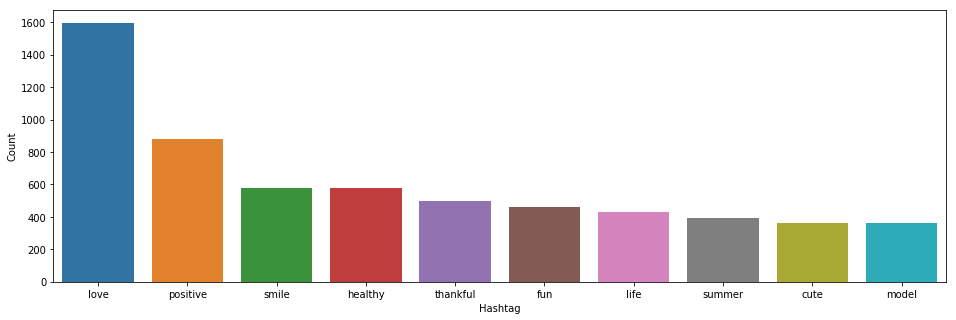

In [78]:
a = nltk.FreqDist(HT_0)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

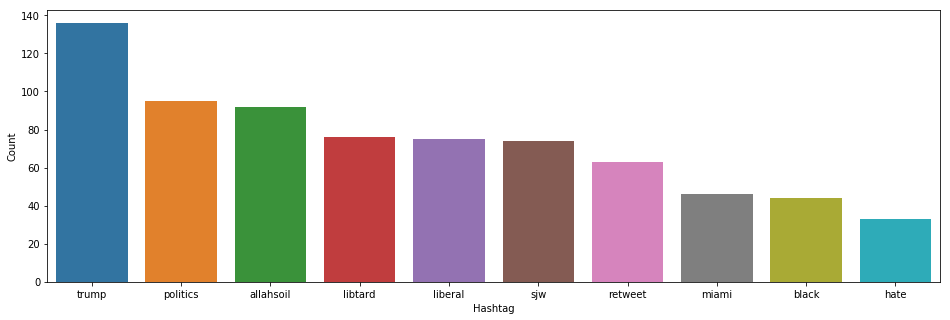

In [79]:
b = nltk.FreqDist(HT_1)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [80]:
meta_freqdist = FreqDist(HT_1)
meta_freqdist.most_common(10)

[('trump', 136),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 33)]

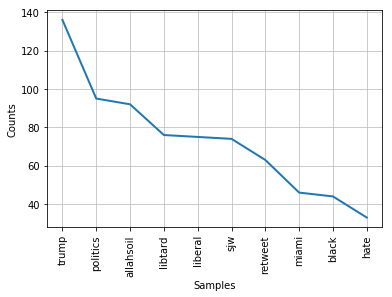

In [81]:
meta_freqdist.plot(10,cumulative=False)

In [82]:
meta_freqdist = FreqDist(HT_0)
meta_freqdist.most_common(10)

[('love', 1596),
 ('positive', 880),
 ('smile', 581),
 ('healthy', 576),
 ('thankful', 496),
 ('fun', 463),
 ('life', 431),
 ('summer', 395),
 ('cute', 365),
 ('model', 365)]

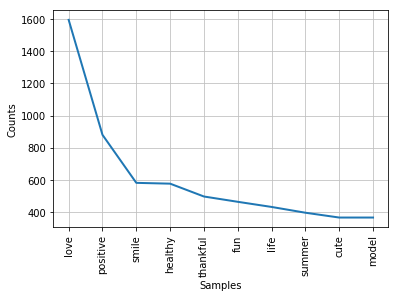

In [83]:
meta_freqdist.plot(10,cumulative=False)

## Bigram

In [26]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
meta_finder = BigramCollocationFinder.from_words(df['no_hash_tweet'])


In [27]:
bigram_scored = meta_finder.score_ngrams(bigram_measures.raw_freq)


In [30]:
bigram_scored[1]

(('you might be a libtard if libtard sjw liberal politics',
  'i finally found a way how to delete old tweets you might find it useful as well deletetweets'),
 9.386146048432514e-05)

## Word 2 Vec Exploration

In [64]:
w2v = gensim.models.Word2Vec.load('data/w2v.model')

In [72]:
w2v.wv.most_similar(['men'])

[('non', 0.8077213168144226),
 ('complaining', 0.7993943095207214),
 ('thinks', 0.7916132211685181),
 ('women', 0.7886711359024048),
 ('gators', 0.7877092957496643),
 ('responsible', 0.7873397469520569),
 ('binds', 0.7855310440063477),
 ('anyone', 0.7843775749206543),
 ('brown', 0.7817881107330322),
 ('grandpa', 0.7800185084342957)]

In [69]:
w2v.wv.most_similar(['women'])

[('men', 0.7886711359024048),
 ('non', 0.7800412178039551),
 ('suppoers', 0.7779800891876221),
 ('pageant', 0.7715924978256226),
 ('deplorable', 0.7653487920761108),
 ('sexual', 0.7641636729240417),
 ('officer', 0.7574792504310608),
 ('fake', 0.7542891502380371),
 ('groups', 0.7536261081695557),
 ('fat', 0.7531337141990662)]

In [76]:
w2v.wv.most_similar(positive=['white'], negative=['color'])

[('racist', 0.2770112156867981),
 ('trump', 0.24265965819358826),
 ('angry', 0.23284977674484253),
 ('young', 0.21328160166740417),
 ('nowumameshigoodtastybeefporklocalshopgoodkuonfeek', 0.21114477515220642),
 ('obama', 0.19466736912727356),
 ('black', 0.18971633911132812),
 ('tcot', 0.18410490453243256),
 ('dead', 0.17397019267082214),
 ('p', 0.16978254914283752)]

In [ ]:
w2v.wv.most_similar(positive=['black'], negative=['color'])

In [68]:
w2v.wv.most_similar(positive=['lazy','black'])

[('scum', 0.9114672541618347),
 ('brown', 0.9058009386062622),
 ('interesting', 0.9045734405517578),
 ('dating', 0.9045312404632568),
 ('chick', 0.8953752517700195),
 ('assholes', 0.8941750526428223),
 ('crayon', 0.8936958312988281),
 ('disabled', 0.8926042318344116),
 ('fool', 0.8924901485443115),
 ('donate', 0.8906980752944946)]